In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings

In [2]:

warnings.filterwarnings('ignore')

# Load your data
data = pd.read_csv('reshaped_data.csv')

# Ensure 'Year' is in datetime format
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

In [3]:

# Filter data for a specific country and industry (example: Germany and Electric power industry)
country = 'Germany'
industry = 'Electric power generation, transmission and distribution industry'
subset = data[(data['Country'] == country) & (data['Industry'] == industry)]
subset.set_index('Year', inplace=True)

In [4]:

# Aggregate emissions by year
time_series = subset['emissions'].resample('Y').sum()

In [5]:

# Fit ARIMA model
model = ARIMA(time_series, order=(5, 1, 0))  # Adjust order as needed
model_fit = model.fit()


In [6]:
# Forecast
forecast = model_fit.forecast(steps=10)  # Forecast for the next 10 years


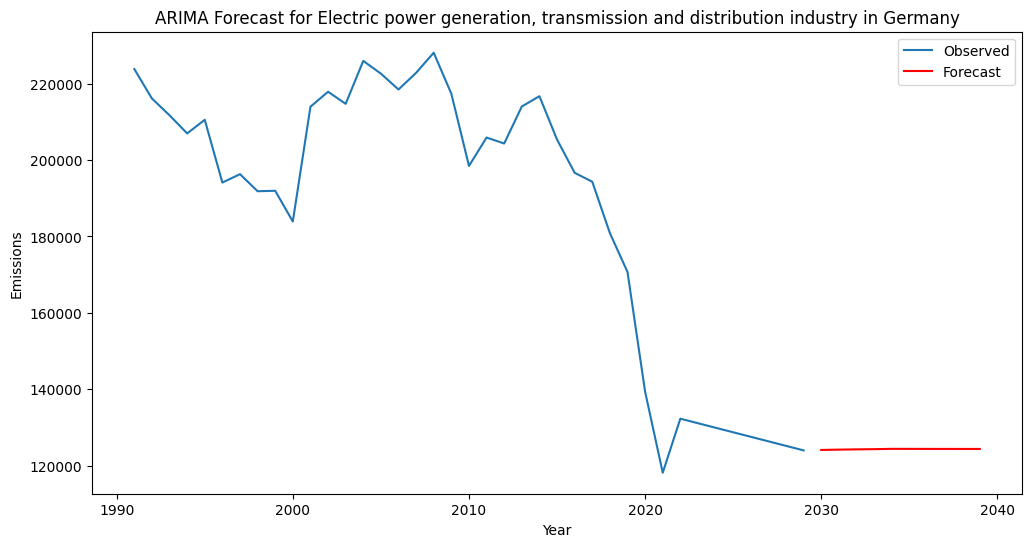

In [7]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.title(f'ARIMA Forecast for {industry} in {country}')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend()
plt.show()

### Statistical Analysis: Perform statistical tests to quantify the significance of trends.

R-squared and Adjusted R-squared: These values indicate how well the linear model fits the data. Higher values (closer to 1) suggest a better fit. 

Slope: Represents the rate of change in emissions over time. A positive slope indicates increasing emissions, while a negative slope indicates decreasing emissions.

Intercept: The estimated value of emissions at the beginning of the analysis period (likely year 0).

Slope p-value: Indicates the statistical significance of the slope. A low p-value (typically less than 0.05) suggests a significant trend in emissions.

Intercept p-value: Indicates the statistical significance of the intercept.

F-statistic and F-statistic p-value: These values test the overall significance of the model. A low p-value indicates the model is significant.

In [8]:
# Group by year and country, summing emissions
country_emissions = data.groupby(['Year', 'Country'])['emissions'].sum().reset_index()

# Group by year and industry, summing emissions
industry_emissions = data.groupby(['Year', 'Industry'])['emissions'].sum().reset_index()


In [19]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

def trend_analysis(df, category_col, value_col, min_data_points=3, p_value_threshold=0.05):
    results = {
        'Country': [],
        'R-squared': [],
        'Adj. R-squared': [],
        'Slope': [],
        'Intercept': [],
        'Slope p-value': [],
        'Intercept p-value': [],
        'F-statistic': [],
        'F-statistic p-value': [],
        'Notes': []
    }
    
    for category in df[category_col].unique():
        subset = df[df[category_col] == category]
        if len(subset) >= min_data_points:
            X = sm.add_constant(np.array(subset['Year'].dt.year))
            y = subset[value_col].values
            model = sm.OLS(y, X).fit()
            p_value = model.pvalues[1]  # p-value for the slope (x1)
            
            if p_value < p_value_threshold:
                # Extract statistics
                results['Country'].append(category)
                results['R-squared'].append(model.rsquared)
                results['Adj. R-squared'].append(model.rsquared_adj)
                results['Slope'].append(model.params[1])
                results['Intercept'].append(model.params[0])
                results['Slope p-value'].append(p_value)
                results['Intercept p-value'].append(model.pvalues[0])
                results['F-statistic'].append(model.fvalue)
                results['F-statistic p-value'].append(model.f_pvalue)
                results['Notes'].append('')
            else:
                print(f"Slope for {category} is not statistically significant (p={p_value:.3f}). Skipping.")
        else:
            print(f"Not enough data points for {category}. Skipping.")
    
    return pd.DataFrame(results)

# Perform trend analysis for country emissions
country_trends_df = trend_analysis(country_emissions, 'Country', 'emissions')

# Save to a CSV file for easy access
country_trends_df.to_csv('country_trends_results.csv', index=False)


Slope for Albania is not statistically significant (p=0.607). Skipping.
Slope for Armenia is not statistically significant (p=0.076). Skipping.
Slope for Belarus is not statistically significant (p=0.956). Skipping.
Slope for Colombia is not statistically significant (p=0.649). Skipping.
Slope for Cuba is not statistically significant (p=0.325). Skipping.
Slope for DR Yemen is not statistically significant (p=nan). Skipping.
Slope for Djibouti is not statistically significant (p=0.297). Skipping.
Slope for Georgia is not statistically significant (p=0.115). Skipping.
Slope for Hong Kong is not statistically significant (p=0.503). Skipping.
Slope for Kazakhstan is not statistically significant (p=0.985). Skipping.
Slope for Kyrgyzstan is not statistically significant (p=0.593). Skipping.
Slope for Lithuania is not statistically significant (p=0.163). Skipping.
Slope for Malta is not statistically significant (p=0.175). Skipping.
Slope for Palestine is not statistically significant (p=na

In [21]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

def trend_analysis(df, category_col, value_col, min_data_points=3, p_value_threshold=0.05):
    results = {
        'Category': [],
        'R-squared': [],
        'Adj. R-squared': [],
        'Slope': [],
        'Intercept': [],
        'Slope p-value': [],
        'Intercept p-value': [],
        'F-statistic': [],
        'F-statistic p-value': [],
        'Notes': []
    }
    
    for category in df[category_col].unique():
        subset = df[df[category_col] == category]
        if len(subset) >= min_data_points:
            X = sm.add_constant(np.array(subset['Year'].dt.year))
            y = subset[value_col].values
            model = sm.OLS(y, X).fit()
            p_value = model.pvalues[1]  # p-value for the slope (x1)
            
            if p_value < p_value_threshold:
                # Extract statistics
                results['Category'].append(category)
                results['R-squared'].append(model.rsquared)
                results['Adj. R-squared'].append(model.rsquared_adj)
                results['Slope'].append(model.params[1])
                results['Intercept'].append(model.params[0])
                results['Slope p-value'].append(p_value)
                results['Intercept p-value'].append(model.pvalues[0])
                results['F-statistic'].append(model.fvalue)
                results['F-statistic p-value'].append(model.f_pvalue)
                results['Notes'].append('')
            else:
                print(f"Slope for {category} is not statistically significant (p={p_value:.3f}). Skipping.")
        else:
            print(f"Not enough data points for {category}. Skipping.")
    
    return pd.DataFrame(results)

# Perform trend analysis for industry emissions
industry_trends_df = trend_analysis(industry_emissions, 'Industry', 'emissions')

# Save to a CSV file for easy access
industry_trends_df.to_csv('industry_trends_results.csv', index=False)


Slope for Administrative services product is not statistically significant (p=nan). Skipping.
Slope for Air transport industry is not statistically significant (p=0.118). Skipping.
Slope for Air transport product is not statistically significant (p=nan). Skipping.
Slope for Alcoholic and other  beverages product is not statistically significant (p=nan). Skipping.
Slope for Aluminium ore product is not statistically significant (p=nan). Skipping.
Slope for Animal oils and fats product is not statistically significant (p=nan). Skipping.
Slope for Arts, entertainment and recreation product is not statistically significant (p=nan). Skipping.
Slope for Basic Copper product is not statistically significant (p=nan). Skipping.
Slope for Basic Gold product is not statistically significant (p=nan). Skipping.
Slope for Basic aluminium product is not statistically significant (p=nan). Skipping.
Slope for Basic inorganic chemicals product is not statistically significant (p=nan). Skipping.
Slope fo

### Statistical Analysis: Visualize results

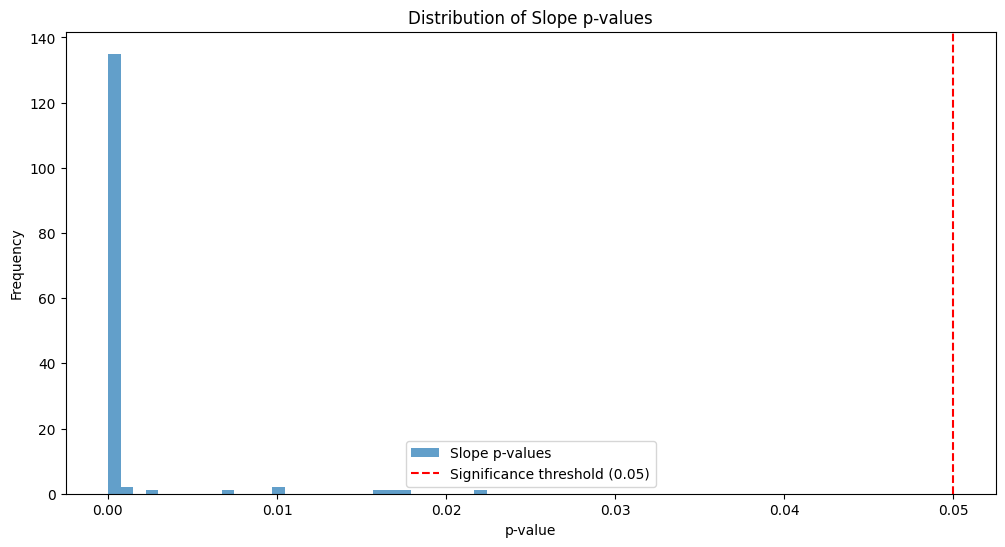

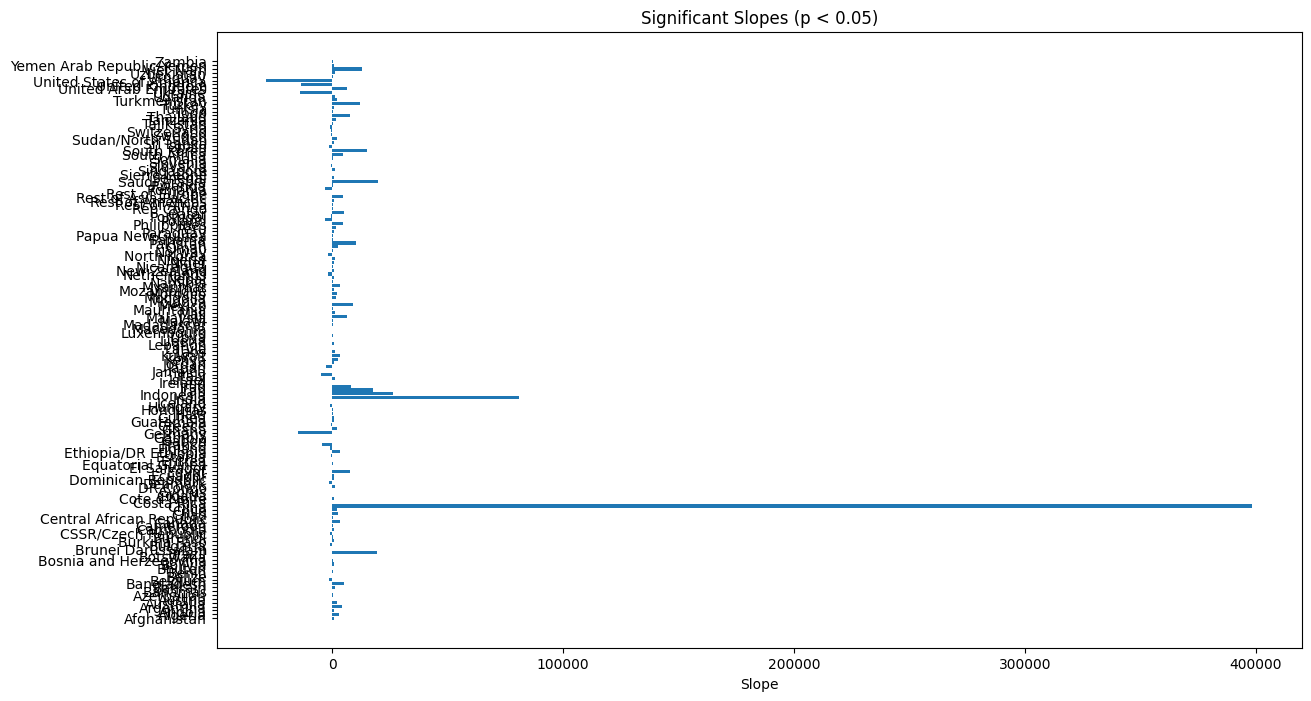

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of p-values for significant slopes
plt.figure(figsize=(12, 6))
plt.hist(country_trends_df['Slope p-value'], bins=30, alpha=0.7, label='Slope p-values')
plt.axvline(x=0.05, color='r', linestyle='--', label='Significance threshold (0.05)')
plt.title('Distribution of Slope p-values')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Bar chart for significant slopes
plt.figure(figsize=(14, 8))
significant_df = country_trends_df[country_trends_df['Slope p-value'] < 0.05]
plt.barh(significant_df['Country'], significant_df['Slope'])
plt.xlabel('Slope')
plt.title('Significant Slopes (p < 0.05)')
plt.show()


#### Rank countries bassed on emissions

In [27]:
# Add a column for the absolute value of the slope
country_trends_df['Absolute Slope'] = country_trends_df['Slope'].abs()

# Sort by absolute slope in descending order
ranked_countries_df = country_trends_df.sort_values(by='Absolute Slope', ascending=False)

# Reset index for cleaner output
ranked_countries_df.reset_index(drop=True, inplace=True)

# Display the ranked DataFrame
print(ranked_countries_df[['Country', 'Slope', 'Absolute Slope', 'Slope p-value']])


                      Country          Slope  Absolute Slope  Slope p-value
0                       China  398535.223844   398535.223844   3.509679e-31
1                       India   80966.789994    80966.789994   6.786144e-33
2    United States of America  -28641.187805    28641.187805   1.208588e-05
3                   Indonesia   26135.371767    26135.371767   1.042472e-27
4                Saudi Arabia   19690.139396    19690.139396   3.749337e-35
..                        ...            ...             ...            ...
140                    Cyprus      45.818644       45.818644   1.472707e-05
141                   Iceland      43.548213       43.548213   6.627951e-06
142                    Gambia      36.853977       36.853977   1.170358e-28
143                   Bahamas      34.318759       34.318759   7.601771e-13
144                    Belize      20.565614       20.565614   2.531060e-15

[145 rows x 4 columns]


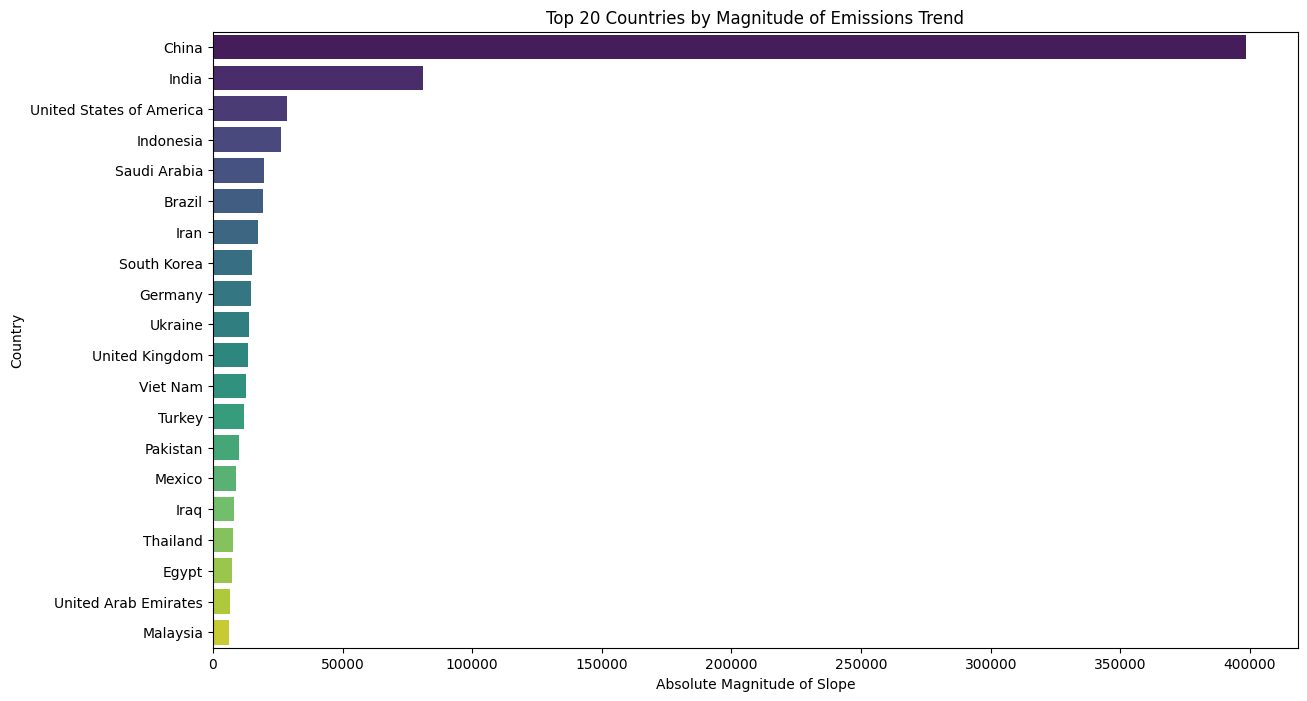

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the top 20 countries with the highest magnitude of slopes
top_n = 20
top_countries = ranked_countries_df.head(top_n)

plt.figure(figsize=(14, 8))
sns.barplot(data=top_countries, x='Absolute Slope', y='Country', palette='viridis')
plt.title(f'Top {top_n} Countries by Magnitude of Emissions Trend')
plt.xlabel('Absolute Magnitude of Slope')
plt.ylabel('Country')
plt.show()



Q1: Which countries have experienced the most significant increases in emissions?

In [32]:
# Filter for countries with positive slopes and statistically significant p-values
significant_increases = ranked_countries_df[(ranked_countries_df['Slope'] > 0) & (ranked_countries_df['Slope p-value'] < 0.05)]

# Display the top countries with the highest positive slopes
print(significant_increases[['Country', 'Slope', 'Absolute Slope', 'Slope p-value']])


          Country          Slope  Absolute Slope  Slope p-value
0           China  398535.223844   398535.223844   3.509679e-31
1           India   80966.789994    80966.789994   6.786144e-33
3       Indonesia   26135.371767    26135.371767   1.042472e-27
4    Saudi Arabia   19690.139396    19690.139396   3.749337e-35
5          Brazil   19324.692320    19324.692320   2.340693e-34
..            ...            ...             ...            ...
140        Cyprus      45.818644       45.818644   1.472707e-05
141       Iceland      43.548213       43.548213   6.627951e-06
142        Gambia      36.853977       36.853977   1.170358e-28
143       Bahamas      34.318759       34.318759   7.601771e-13
144        Belize      20.565614       20.565614   2.531060e-15

[110 rows x 4 columns]


Q2: Are there any countries that have successfully reduced their emissions?

In [34]:
# Filter for countries with negative slopes and statistically significant p-values
significant_reductions = ranked_countries_df[(ranked_countries_df['Slope'] < 0) & (ranked_countries_df['Slope p-value'] < 0.05)]

# Display the top countries with significant negative slopes
print(significant_reductions[['Country', 'Slope', 'Absolute Slope', 'Slope p-value']])


                      Country         Slope  Absolute Slope  Slope p-value
2    United States of America -28641.187805    28641.187805   1.208588e-05
8                     Germany -14794.556342    14794.556342   7.817473e-27
9                     Ukraine -13888.610068    13888.610068   1.548478e-15
10             United Kingdom -13617.559468    13617.559468   1.973224e-23
22                      Italy  -4908.915481     4908.915481   1.044794e-12
27                     France  -4259.488421     4259.488421   7.171987e-20
31                     Poland  -3181.299357     3181.299357   1.051704e-15
34                    Romania  -3073.015383     3073.015383   1.532866e-17
35                      Japan  -2700.439795     2700.439795   5.380588e-04
43                North Korea  -1983.318168     1983.318168   3.447293e-11
46                Netherlands  -1783.172041     1783.172041   2.392222e-22
50                      Spain  -1470.678000     1470.678000   1.682306e-02
51                    Den

Q3: How do the emission trends compare to global average emissions?

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     2139.
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           2.41e-34
Time:                        10:44:20   Log-Likelihood:                -593.27
No. Observations:                  39   AIC:                             1191.
Df Residuals:                      37   BIC:                             1194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.289e+09   2.87e+07    -44.910      0.0

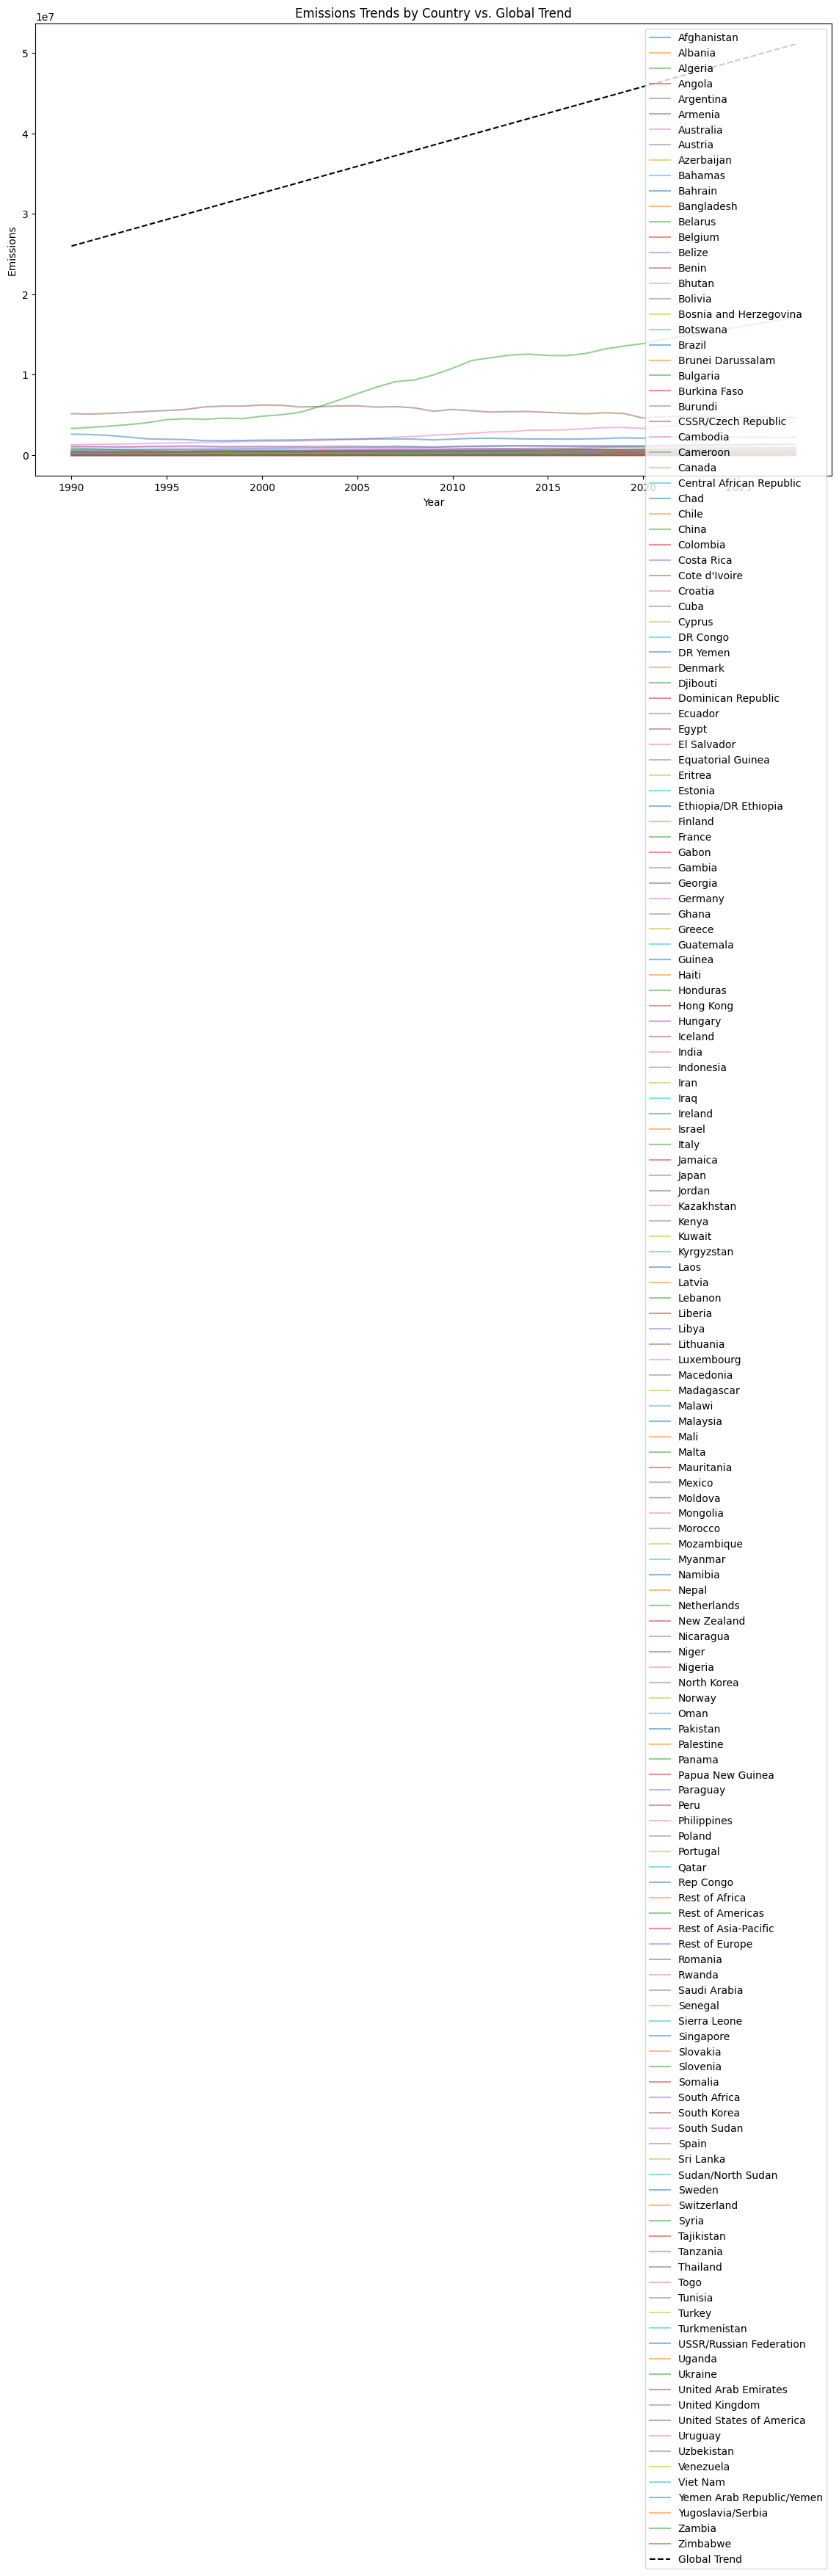

In [35]:
# Aggregate emissions data globally
global_emissions = country_emissions.groupby('Year')['emissions'].sum().reset_index()
global_emissions['Year'] = pd.to_datetime(global_emissions['Year'], format='%Y')

# Perform trend analysis for global emissions
X_global = sm.add_constant(np.array(global_emissions['Year'].dt.year))
y_global = global_emissions['emissions'].values
global_model = sm.OLS(y_global, X_global).fit()

# Print global trend results
print(global_model.summary())

# Compare with individual countries
plt.figure(figsize=(14, 8))
sns.lineplot(data=country_emissions, x='Year', y='emissions', hue='Country', palette='tab10', alpha=0.5)
plt.plot(global_emissions['Year'], global_model.predict(X_global), color='black', linestyle='--', label='Global Trend')
plt.title('Emissions Trends by Country vs. Global Trend')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend()
plt.show()


Critical Interpretation of Overall Trend:

Strong Positive Trend: The R-squared value of 0.983 indicates a very strong fit of the linear model to the global emissions data. This suggests that the trend in global emissions is highly predictable by the year, showing a clear and strong upward trend.

Slope Significance: The coefficient for the year variable is highly significant (p < 0.001), indicating a robust positive trend. The positive slope of 660,800 implies that global emissions have increased significantly over the years.

Statistical Significance:

F-statistic and p-value: The extremely high F-statistic and its associated p-value (2.41e-34) confirm that the trend is statistically significant. This suggests that the increase in global emissions over time is not due to random chance.

Intercept and Slope: The intercept (-1.29e+09) and slope (660,800) are both highly significant, suggesting that the model parameters are reliable.





